In [1]:
import json
from glob import glob
from collections import defaultdict

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("LLMs/meta-llama/Meta-Llama-3-8B/")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
tokenizer.tokenize("Hello, world!")

['Hello', ',', 'Ġworld', '!']

In [8]:
subjs = glob('MATH/test/*')
subjs = [s.split('/')[-1] for s in subjs]
subjs.sort()
subjs

['algebra',
 'counting_and_probability',
 'geometry',
 'intermediate_algebra',
 'number_theory',
 'prealgebra',
 'precalculus']

In [9]:
for subj in subjs:
    data = glob(f'MATH/test/{subj}/*.json')
    print(subj, len(data))

algebra 1187
counting_and_probability 474
geometry 479
intermediate_algebra 903
number_theory 540
prealgebra 871
precalculus 546


In [10]:
# level count
for subj in subjs:
    data = glob(f'MATH/test/{subj}/*.json')
    level_count = defaultdict(int)
    for d in data:
        with open(d) as f:
            data = json.load(f)
            level_count[data['level']] += 1
    # sort level_count by name
    level_count = dict(sorted(level_count.items()))
    print(subj, level_count)

algebra {'Level 1': 135, 'Level 2': 201, 'Level 3': 261, 'Level 4': 283, 'Level 5': 307}
counting_and_probability {'Level 1': 39, 'Level 2': 101, 'Level 3': 100, 'Level 4': 111, 'Level 5': 123}
geometry {'Level 1': 38, 'Level 2': 82, 'Level 3': 102, 'Level 4': 125, 'Level 5': 132}
intermediate_algebra {'Level 1': 52, 'Level 2': 128, 'Level 3': 195, 'Level 4': 248, 'Level 5': 280}
number_theory {'Level 1': 30, 'Level 2': 92, 'Level 3': 122, 'Level 4': 142, 'Level 5': 154}
prealgebra {'Level 1': 86, 'Level 2': 177, 'Level 3': 224, 'Level 4': 191, 'Level 5': 193}
precalculus {'Level 1': 57, 'Level 2': 113, 'Level 3': 127, 'Level 4': 114, 'Level 5': 135}


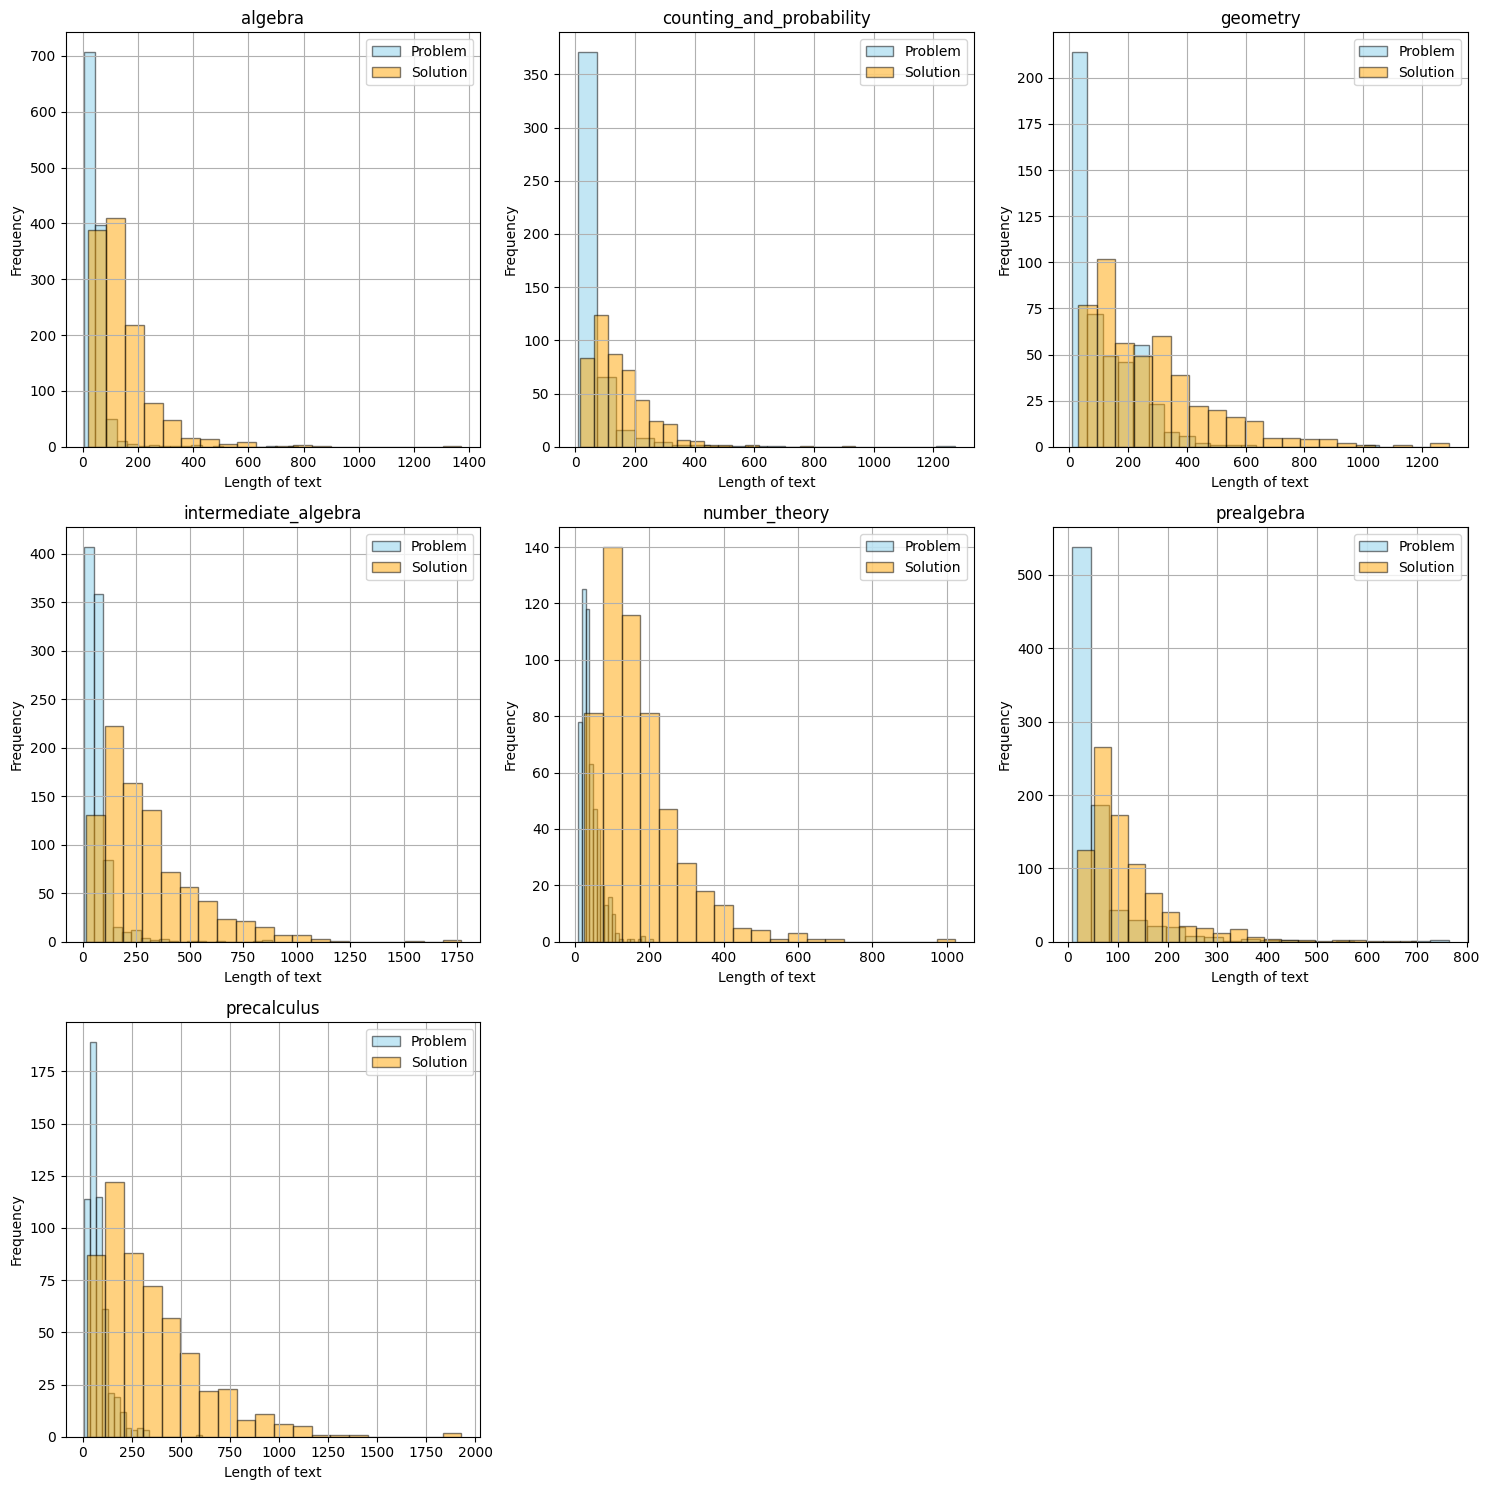

In [11]:
import matplotlib.pyplot as plt
from glob import glob
import json

fig, axes = plt.subplots(nrows=(len(subjs) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(subjs) + 2) // 3)))
axes = axes.flatten()

for idx, subj in enumerate(subjs):
    data_files = glob(f'MATH/test/{subj}/*.json')
    lengths_problem = []
    lengths_solution = []

    for d in data_files:
        with open(d) as f:
            data = json.load(f)
            lengths_problem.append(len(tokenizer.tokenize(data['problem'])))
            lengths_solution.append(len(tokenizer.tokenize(data['solution'])))

    ax = axes[idx]
    ax.hist(lengths_problem, bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Problem')
    ax.hist(lengths_solution, bins=20, color='orange', edgecolor='black', alpha=0.5, label='Solution') 
    ax.set_title(f'{subj}')
    ax.set_xlabel('Length of text')
    ax.set_ylabel('Frequency')
    ax.grid(True)
    ax.legend()

for ax in axes[idx+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

# 定义两个矩阵
matrix1 = np.array([
    [np.sqrt(2)/2, np.sqrt(2)/2],
    [-np.sqrt(2)/2, np.sqrt(2)/2]
])

matrix2 = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2)],
    [-1/np.sqrt(2), 1/np.sqrt(2)]
])

# 比较两个矩阵
are_equal = np.allclose(matrix1, matrix2)

print("两个矩阵是否相等:", are_equal)

两个矩阵是否相等: True


In [1]:
import numpy as np
import sympy as sp
from sympy.parsing.latex import parse_latex

def latex_to_numpy(latex_str):
    """
    将LaTeX矩阵表达式转换为NumPy数组。
    """
    # 解析LaTeX字符串为SymPy表达式
    sympy_mat = parse_latex(latex_str)

    # 将SymPy矩阵转换为NumPy数组
    numpy_array = np.array(sympy_mat.tolist()).astype(float)
    return numpy_array

def compare_matrices(latex_mat1, latex_mat2):
    """
    解析两个LaTeX矩阵表达式，并比较它们是否相等。
    """
    # 转换LaTeX到NumPy数组
    mat1 = latex_to_numpy(latex_mat1)
    mat2 = latex_to_numpy(latex_mat2)

    # 使用NumPy的 allclose 方法比较两个矩阵
    return np.allclose(mat1, mat2)

# LaTeX矩阵表达式
latex_matrix1 = r"\begin{bmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}"
latex_matrix2 = r"\begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \end{pmatrix}"

# 比较两个矩阵
result = compare_matrices(latex_matrix1, latex_matrix2)
print("两个矩阵是否相等:", result)

LaTeXParsingError: I don't understand this
\begin{bmatrix} \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\ -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^

In [1]:
latex_str="frac{1}{2}"
c = parse_latex(latex_str)

NameError: name 'parse_latex' is not defined